# IPCV / SW05 - Filter II

Loesungen von: Timo Furrer <tuxtimo@gmail.com>

In [1]:
import numpy as np
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline
# resolution of images in figure
mpl.rcParams['figure.dpi']= 200
# figure size in inches
mpl.rcParams["figure.figsize"] = [20, 5]

## Aufgabe 1

In [2]:
m_1 = (1 / 3) * np.array([1, 1, 1])
m_2 = ((1 / 3) * np.array([1, 1, 1])).T

tiefpass_filter = np.array([[1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9]])

In [3]:
assert np.all(x == y for x, y in zip(np.convolve(m_1, m_2), np.convolve(m_2, m_1)))

## Aufgabe 2

In [4]:
# Create x1[m,n] (zero-padded version)
x1 = cv2.imread("images/cameraman.tif");
x1 = cv2.copyMakeBorder(x1, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
# Auf allen 4 Seiten mit 0 padden

# y1[m,n] = F(x1[m,n])
y1 = cv2.medianBlur(x1, 3)

# x2[m,n] = x1[m-1,n-1]
x2 = np.zeros((258,258,3))
x2[3:258,3:258] = x1[2:257,2:257]

# y2[m,n] = median{x2[i,j],(i,j) belong to 3x3 neighbourhood}
y2 = cv2.medianBlur(x2, 3)
y2 = y1

# Compute y1[m-1,n-1]
y1_shifted = np.zeros((258,258,3))
y1_shifted[3:258,3:258] = y1[2:257,2:257]

# Display the inputs and outputs
plt.subplot(2,2,1)
plt.imshow(x1)
plt.subplot(2,2,2)
plt.imshow(x2)
plt.subplot(2,2,3)
plt.imshow(y1)
plt.subplot(2,2,4)
plt.imshow(y2)

# Compare y2[m,n] and y1[m-1,n-1] and display

diff = cv2.normalize(y1_shifted.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX) - cv2.normalize(y2.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
plt.imshow(diff,[]),title('y1[m-1,n-1] - y2[m,n]')

error: OpenCV(4.0.0) /io/opencv/modules/imgproc/src/median_blur.cpp:1213: error: (-210:Unsupported format or combination of formats)  in function 'medianBlur'


## Aufgabe 3

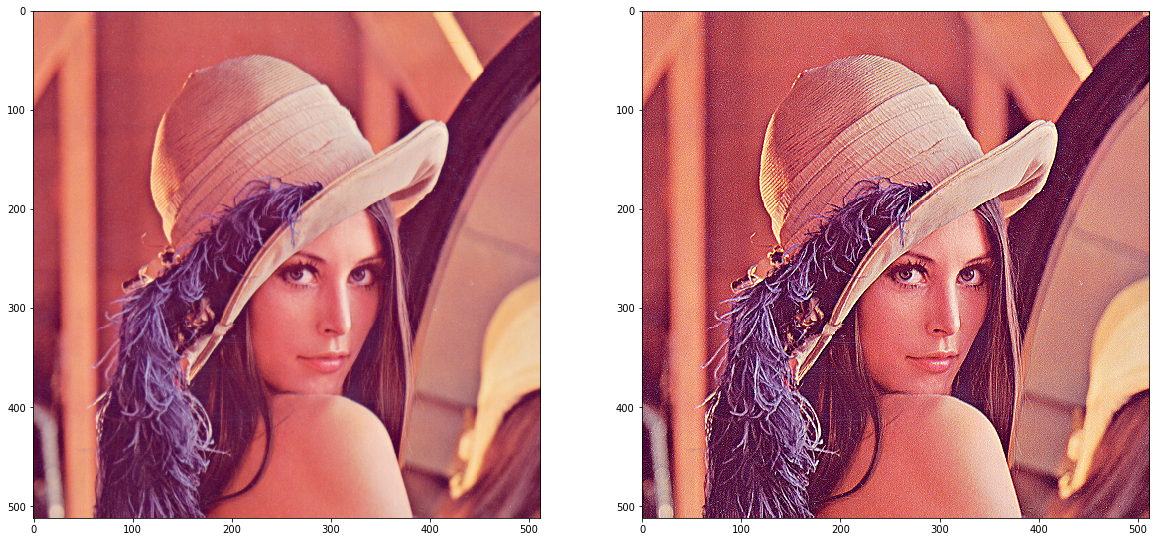

In [5]:
img = cv2.imread("images/lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

laplace_3_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

im = cv2.filter2D(img, -1, laplace_3_kernel)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(im)
plt.show()

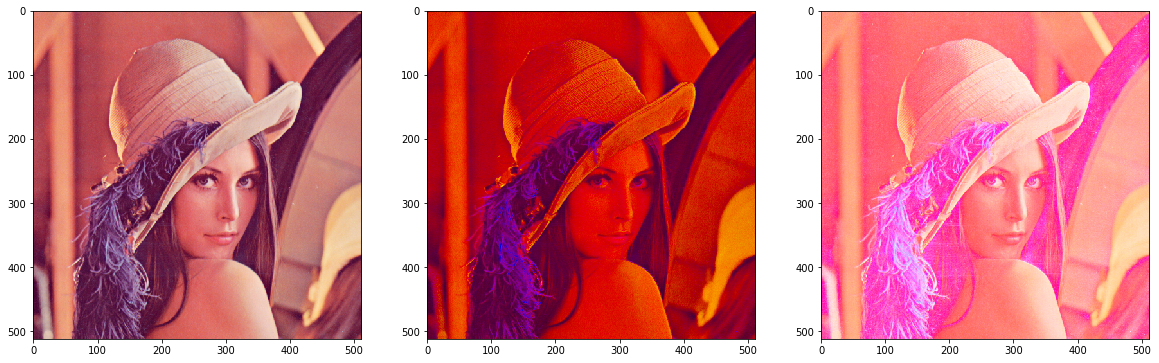

In [6]:
image = cv2.imread("images/lena_std.tif")
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

binomial_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

image_saturated = image.copy()
image_saturated[:,:,1] = cv2.filter2D(image[:,:,1], -1, binomial_kernel)

image_valued = image.copy()
image_valued[:,:,2] = cv2.filter2D(image[:,:,2], -1, binomial_kernel)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_saturated, cv2.COLOR_HSV2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_valued, cv2.COLOR_HSV2RGB))
plt.show()

## Aufgabe 4

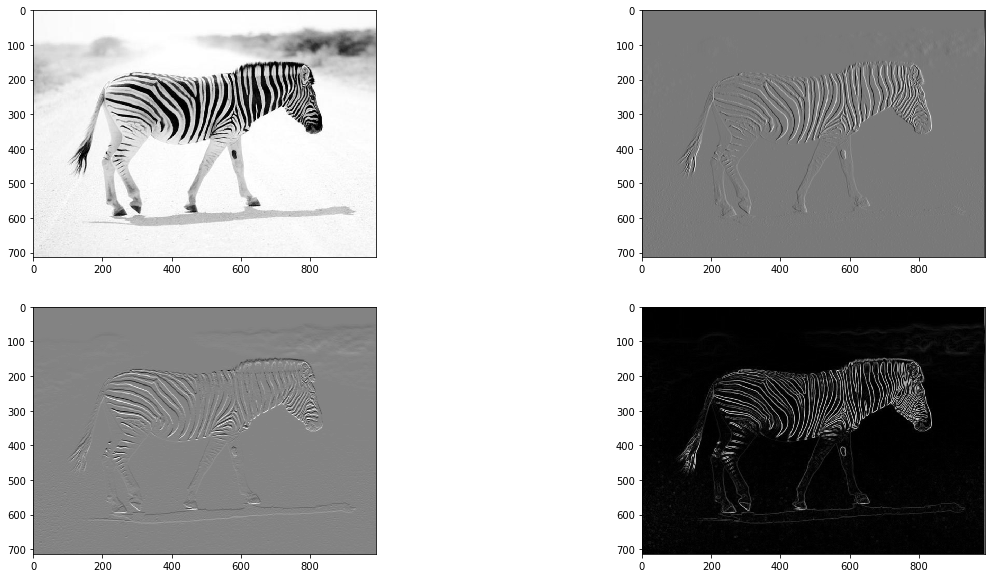

In [7]:
image = cv2.imread("images/Zebra.png", 0)

kernelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

dx = cv2.filter2D(image, cv2.CV_64F, kernelX)
dy = cv2.filter2D(image, cv2.CV_64F, kernelY)

absolute_gradient = np.sqrt(np.add(np.square(dx), np.square(dy)))

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(dx, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(dy, cmap="gray")
plt.subplot(2, 2, 4)
plt.imshow(absolute_gradient, cmap="gray")
plt.show()

## Aufgabe 5

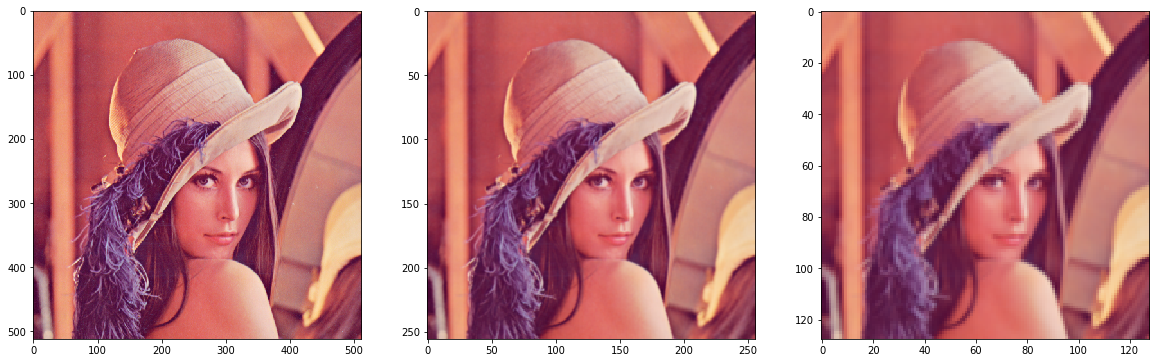

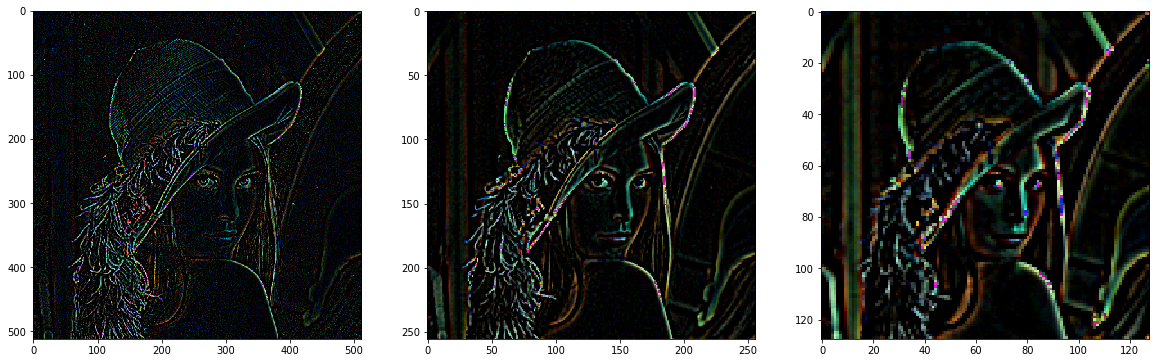

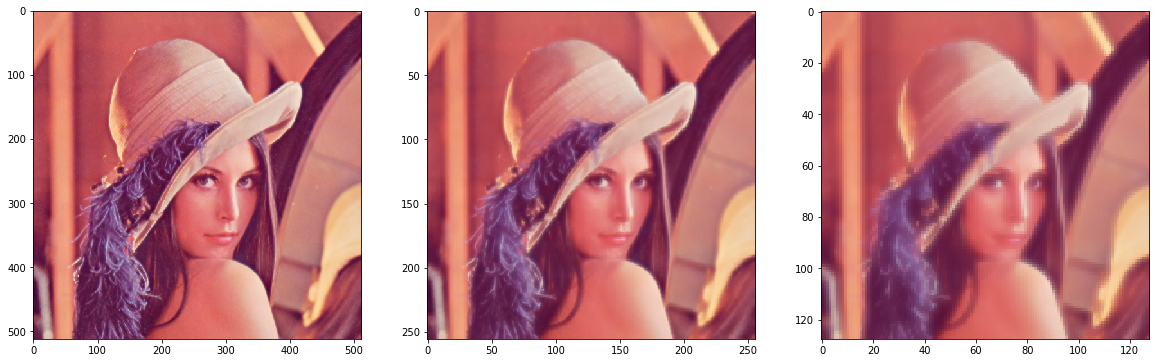

In [9]:
image = cv2.imread('images/lena_std.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

level0 = image.copy()

level1 = cv2.pyrDown(level0)
level2 = cv2.pyrDown(level1)
level3 = cv2.pyrDown(level2)

laplacian0 = cv2.subtract(level0, cv2.pyrUp(level1))
laplacian1 = cv2.subtract(level1, cv2.pyrUp(level2))
laplacian2 = cv2.subtract(level2, cv2.pyrUp(level3))

combined0 = cv2.add(laplacian0, cv2.pyrUp(level1))
combined1 = cv2.add(laplacian1, cv2.pyrUp(level2))
combined2 = cv2.add(laplacian2, cv2.pyrUp(level3))

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(level0)
plt.subplot(1, 3, 2), 
plt.imshow(level1)
plt.subplot(1, 3, 3), 
plt.imshow(level2)
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(6 * laplacian0)
plt.subplot(1, 3, 2)
plt.imshow(6 * laplacian1)
plt.subplot(1, 3, 3)
plt.imshow(6 * laplacian2)
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(combined0)
plt.subplot(1, 3, 2)
plt.imshow(combined1)
plt.subplot(1, 3, 3)
plt.imshow(combined2)
plt.show()